# This is a simple version to experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import h5py

from skimage.util.montage import montage2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

Load a single ct, pet and a segmentation via superpixel

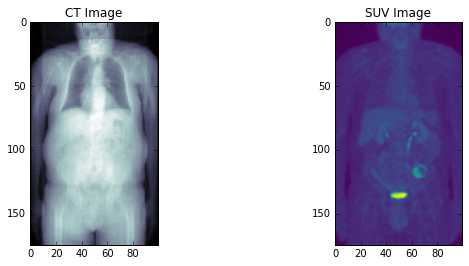

In [4]:
with h5py.File(os.path.join('..', 'input', 'lab_petct_vox_5.00mm.h5'), 'r') as p_data:
    id_list = list(p_data['ct_data'].keys())
    ct_image = p_data['ct_data'][id_list[0]].value
    pet_image = p_data['pet_data'][id_list[0]].value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
ct_proj = np.mean(ct_image, 1)[::-1]
suv_max = np.sqrt(np.max(pet_image, 1)[::-1])
ax1.imshow(ct_proj, cmap = 'bone')
ax1.set_title('CT Image')
ax2.imshow(suv_max, cmap = 'viridis')
ax2.set_title('SUV Image')